In [39]:
import pandas as pd
import numpy as np
from glob import glob
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [40]:
!ls ../predictions/forecast_1_aware_tgcn_dynamic_2

predictions_TGCN_BRYANT_j4m7krag_2.csv
predictions_TGCN_CAMBRIDGE_j4m7krag_2.csv
predictions_TGCN_HAMILTON_j4m7krag_2.csv
predictions_TGCN_HIGH_j4m7krag_2.csv
predictions_TGCN_MPL_j4m7krag_2.csv
predictions_TGCN_RINCONADA_j4m7krag_2.csv
predictions_TGCN_TED_j4m7krag_2.csv
predictions_TGCN_WEBSTER_j4m7krag_2.csv


In [41]:
cluster_names = [
    "BRYANT",
    "CAMBRIDGE",
    "HAMILTON",
    "HIGH",
    "MPL",
    "RINCONADA",
    "TED",
    "WEBSTER",
]

In [90]:
maes_unaware = []
maes_aware = []
for cluster in cluster_names:
    df_aware = pd.read_csv(glob(f"../predictions/forecast_1_aware_tgcn_dynamic_2/*{cluster}*")[0], index_col=0)
    df_unaware = pd.read_csv(glob(f"../predictions/forecast_1_unaware_tgcn_dynamic_2/*{cluster}*")[0], index_col=0)
    pred_col = f"{cluster}_1"
    maes_unaware.append(mean_absolute_error(df_unaware[pred_col], df_unaware[pred_col+'_pred']))
    maes_aware.append(mean_absolute_error(df_aware[pred_col], df_aware[pred_col+'_pred']))

In [91]:
df_losses = pd.DataFrame({'cluster': cluster_names, 'mae_unaware': maes_unaware, 'mae_aware': maes_aware})
df_losses

,cluster,mae_unaware,mae_aware
0,BRYANT,0.927888,0.767173
1,CAMBRIDGE,0.791751,0.855644
2,HAMILTON,0.726947,1.514111
3,HIGH,0.763246,0.792396
4,MPL,0.300162,0.531623
5,RINCONADA,0.290918,0.392738
6,TED,0.733154,0.845198
7,WEBSTER,0.569917,0.917863


In [92]:
df_losses['cluster_contrib_unaware'] = df_losses.mae_unaware / df_losses.mae_unaware.sum()
df_losses['cluster_contrib_aware'] = df_losses.mae_aware / df_losses.mae_aware.sum()

In [93]:
df_losses

,cluster,mae_unaware,mae_aware,cluster_contrib_unaware,cluster_contrib_aware
0,BRYANT,0.927888,0.767173,0.181797,0.115944
1,CAMBRIDGE,0.791751,0.855644,0.155124,0.129315
2,HAMILTON,0.726947,1.514111,0.142427,0.228830
3,HIGH,0.763246,0.792396,0.149539,0.119756
4,MPL,0.300162,0.531623,0.058809,0.080345
5,RINCONADA,0.290918,0.392738,0.056998,0.059355
6,TED,0.733154,0.845198,0.143643,0.127736
7,WEBSTER,0.569917,0.917863,0.111661,0.138718


<Axes: title={'center': 'Cluster contribution to MAE'}, xlabel='cluster'>

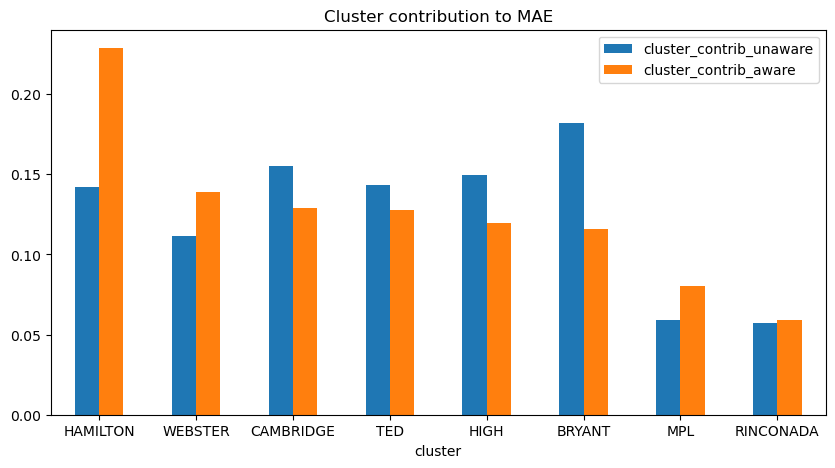

In [94]:
df_losses.sort_values('cluster_contrib_aware', ascending=False).plot(x='cluster', y=['cluster_contrib_unaware', 'cluster_contrib_aware'], kind='bar', figsize=(10, 5), rot=0, title='Cluster contribution to MAE'
)

In [78]:
print(f"MAE unaware: {np.mean(maes_unaware)}")
print(f"MAE aware: {np.mean(maes_aware)}")

MAE unaware: 0.6379979558052784
MAE aware: 0.8270933641991047


In [79]:
np.array(maes_aware)

array([0.76717263, 0.8556439 , 1.51411079, 0.79239647, 0.53162329,
       0.39273818, 0.84519849, 0.91786315])

In [80]:
np.array(maes_unaware) - np.array(maes_aware)

array([ 0.16071579, -0.06389255, -0.78716335, -0.02915028, -0.23146175,
       -0.10182031, -0.11204495, -0.34794587])

In [44]:
df_unaware

,WEBSTER_1,WEBSTER_1_pred,WEBSTER_1_true
Date,,,
2019-04-08 00:30:00,0.0,0.016278,NaN
2019-04-08 01:00:00,0.0,0.014874,NaN
2019-04-08 01:30:00,0.0,0.014594,NaN
2019-04-08 02:00:00,0.0,0.015215,NaN
2019-04-08 02:30:00,0.0,0.017062,NaN
...,...,...,...
2019-06-30 22:00:00,1.0,0.765798,NaN
2019-06-30 22:30:00,1.0,0.472789,NaN
2019-06-30 23:00:00,1.0,0.323416,NaN
